In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#dropando as colunas que eu nao vou usar
df = df.drop(['Name','Cabin','PassengerId','Ticket'],axis=1)


In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
#vendo os valores valores nulos
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
#vendo a mediana da idade por classe
df.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
#criando uma funcao que substitua a os NaN na coluna idade por classes
def impute_age(cols):
  Pclass = cols[0]
  Age = cols[1]

  if pd.isnull(Age):
    if Pclass ==1:
       return 37
    elif Pclass ==2:
      return 29
    elif Pclass ==3:
      return 24
  else:
    return Age



In [ ]:
#aplicando a funcao
df['Age'] = df[['Pclass','Age']].apply(impute_age,axis=1)

0

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
#dropando o resto dos NaN que eram apenas duas linhas em embarked
df.dropna(inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<Axes: xlabel='Pclass', ylabel='Age'>

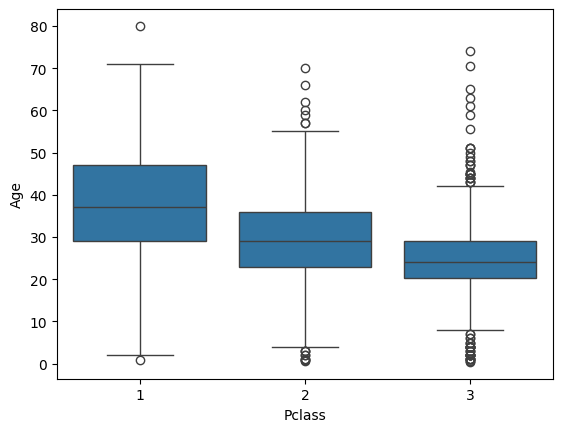

In [ ]:
#Box Plot para verificar se ainda ha outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df,x='Pclass',y='Age')

Tirando os duplicados

In [ ]:
df_cleaned = df.drop(['Embarked','Sex','Pclass'],axis=1)
df_cleaned.head()


,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [ ]:
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
sex = pd.get_dummies(df['Sex'],drop_first=True)
class_ = pd.get_dummies(df['Pclass'],drop_first=True)
df_ready = pd.concat([df_cleaned,embarked,sex,class_],axis=1)

In [ ]:
df_ready

,Survived,Age,SibSp,Parch,Fare,Q,S,male,2,3
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,1,1,0
887,1,19.0,0,0,30.0000,0,1,0,0,0
888,0,24.0,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0


In [ ]:
#time to model
X = df_ready.drop('Survived',axis =1)
y = df_ready['Survived']


!pip install lightgbm


In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)



In [ ]:
lgb  = LGBMClassifier()

lgb.fit(X_train,y_train)



[LightGBM] [Info] Number of positive: 265, number of negative: 446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372714 -> initscore=-0.520589
[LightGBM] [Info] Start training from score -0.520589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [ ]:
y_pred = lgb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89       103
           1       0.88      0.79      0.83        75

    accuracy                           0.87       178
   macro avg       0.87      0.85      0.86       178
weighted avg       0.87      0.87      0.86       178



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[95  8]
 [16 59]]
